# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [66]:
# import statements, allow chaining with no warning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [67]:
# loading data
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [68]:
df.shape

(1715, 25)

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [69]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [70]:
#renaming columns for accessibility
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [71]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [72]:
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [73]:
df.notna().sum()

PRIMARY_KEY                     1715
STATE                           1715
YEAR                            1715
ENROLL_ALL_EST                  1224
TOTAL_REVENUE                   1275
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1275
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1224
CAPITAL_OUTLAY_EXPENDITURE      1275
ENROLL_PREK                     1542
ENROLL_KINDER                   1632
ENROLL_4                        1632
ENROLL_8                        1632
ENROLL_12                       1632
ENROLL_PRIMARY                  1020
ENROLL_HS                       1071
ENROLL_ALL                      1632
AVG_MATH_4_SCORE                 565
AVG_MATH_8_SCORE                 602
AVG_READING_4_SCORE              650
AVG_READING_8_SCORE              562
dtype: int64

In [74]:
# Choosing average NAEP math score for 4th graders, AVG_MATH_4_Score, as variable of interest
# Dropping observations with a null value for the response
df.dropna(subset=["AVG_MATH_4_SCORE"], inplace = True)

In [75]:
# Clean up of enrollment estimates
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG_MATH_4_SCORE*

How many years of data are logged in our dataset? 

In [76]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


In [77]:
# Finding both the number of years, as well as the individual years themselves
print(df["YEAR"].unique())
print(df["YEAR"].nunique())

[1992 2000 2003 2005 2007 2009 2011 2013 2015 2017 1990 1996 2019]
13


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [78]:
# Segmenting by State, than finding the mean on the outcome variable
michigan = df[df["STATE"] == "MICHIGAN"]["AVG_MATH_4_SCORE"].mean()
ohio = df[df["STATE"] == "OHIO"]["AVG_MATH_4_SCORE"].mean()

print("Michigan Average Score: " + str(round(michigan, 2)))
print("Ohio Average Score: " + str(round(ohio, 2)))
print("Ohio has a higher average outcome score")

Michigan Average Score: 234.36
Ohio Average Score: 239.45
Ohio has a higher average outcome score


Find the average for your outcome score across all states in 2019

In [79]:
# Segmenting by year, grouping by state, applying mean
year = df[df["YEAR"] == 2019]
year.groupby("STATE")["AVG_MATH_4_SCORE"].mean()

STATE
ALABAMA                 230.0
ALASKA                  232.0
ARIZONA                 238.0
ARKANSAS                233.0
CALIFORNIA              235.0
COLORADO                242.0
CONNECTICUT             243.0
DELAWARE                239.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 238.0
HAWAII                  239.0
IDAHO                   242.0
ILLINOIS                237.0
INDIANA                 245.0
IOWA                    241.0
KANSAS                  239.0
KENTUCKY                239.0
LOUISIANA               231.0
MAINE                   241.0
MARYLAND                239.0
MASSACHUSETTS           247.0
MICHIGAN                236.0
MINNESOTA               248.0
MISSISSIPPI             241.0
MISSOURI                238.0
MONTANA                 241.0
NATIONAL                241.0
NEBRASKA                244.0
NEVADA                  236.0
NEW_HAMPSHIRE           245.0
NEW_JERSEY              246.0
NEW_

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [80]:
# Grouping by state, applying mean to outcome variable
df.groupby("STATE")["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [81]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [82]:
# Creating new columns based off percentages of existing variables

df["PERCENT_LOCAL_REVENUE"] = (df["LOCAL_REVENUE"]/df["TOTAL_REVENUE"])*100
df["PERCENT_STATE_REVENUE"] = (df["STATE_REVENUE"]/df["TOTAL_REVENUE"])*100
df["PERCENT_INSTRUCTION_EXPENDITURE"] = (df["INSTRUCTION_EXPENDITURE"]/df["TOTAL_EXPENDITURE"])*100
df["PERCENT_SUPPORT_EXPENDITURE"] = (df["SUPPORT_SERVICES_EXPENDITURE"]/df["TOTAL_EXPENDITURE"])*100


Feature engineering justification: *My initial thought, prior to visualization and pattern recognition, is that the amount of revenue generated locally, at the state level, as well as the amount of expenditure on instruction is positively correlated with AVG_MATH_4_SCORE. My perception is that the more money localities and states generate, the less they rely on the federal government for funding, and can put back into their commmunities, leading to better quality education. Additionally, these revenue amounts can also indicate the state of the economy and financial wellness, which may be important to determing test scores. Because revenue amounts can vary by state, year, and other potentialy confounders, a percentage was calculated to standardize it. Finally, somewhat simpler, is calculating the percentage of expenditure spent on instruction and support services; common sense tells me the higher the percent the higher scores, but I can't be for sure until I explore the data* 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.



**Prior to visualizing relationships, I would like to visualize the response variable to look at its distribution**

<AxesSubplot: title={'center': 'Distribution of 4th Grade Math Scores'}, ylabel='Frequency'>

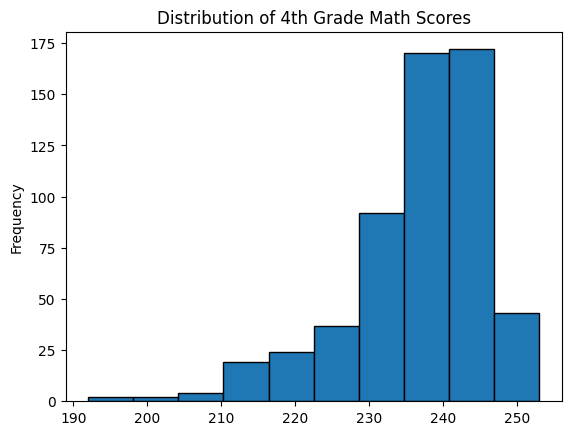

In [83]:
df.AVG_MATH_4_SCORE.plot.hist(title="Distribution of 4th Grade Math Scores", edgecolor="black")

**Scores Skewed to the Left, Mode>Median>Mean**

**Visualization 1**

Text(0, 0.5, '4th Grade Math Score')

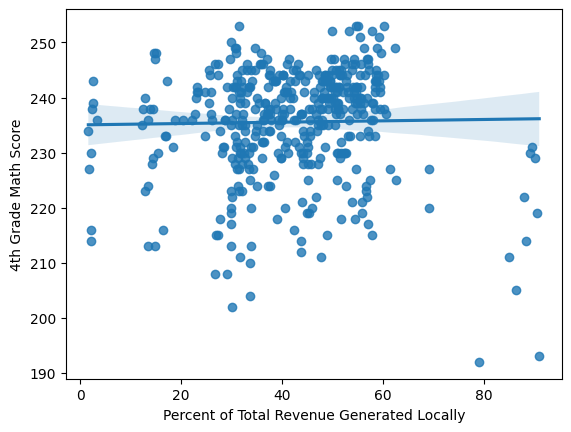

In [84]:
# df.plot.scatter(x='PERCENT_LOCAL_REVENUE', y='AVG_MATH_4_SCORE', alpha=0.6)
# plt.xlabel('Percent of Total Revenue Generated Locally')
# plt.ylabel('4th Grade Math Score')

sns.regplot(x = df['PERCENT_LOCAL_REVENUE'],y = df['AVG_MATH_4_SCORE'])
plt.xlabel('Percent of Total Revenue Generated Locally')
plt.ylabel('4th Grade Math Score')

**Doesn't seem to be any notable correlation, intial assumption wrong**

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

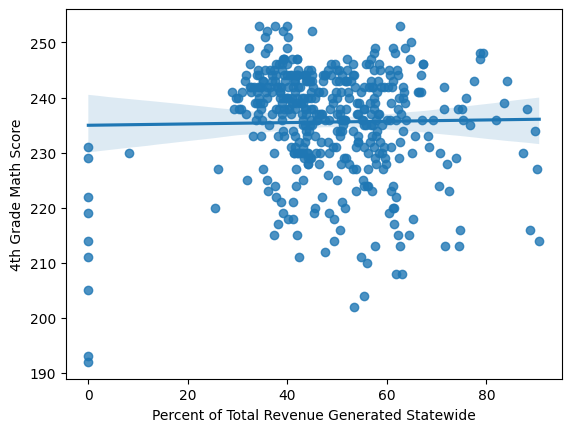

In [85]:
# df.plot.scatter(x='PERCENT_STATE_REVENUE', y='AVG_MATH_4_SCORE', alpha=0.6)
# plt.xlabel('Percent of Total Revenue Generated Statewide')
# plt.ylabel('4th Grade Math Score')

sns.regplot(x = df['PERCENT_STATE_REVENUE'], y = df['AVG_MATH_4_SCORE'])
plt.xlabel('Percent of Total Revenue Generated Statewide')
plt.ylabel('4th Grade Math Score')

**Doesn't seem to be any notable correlation, intial assumption wrong**

**Visualization 3**

Text(0, 0.5, '4th Grade Math Score')

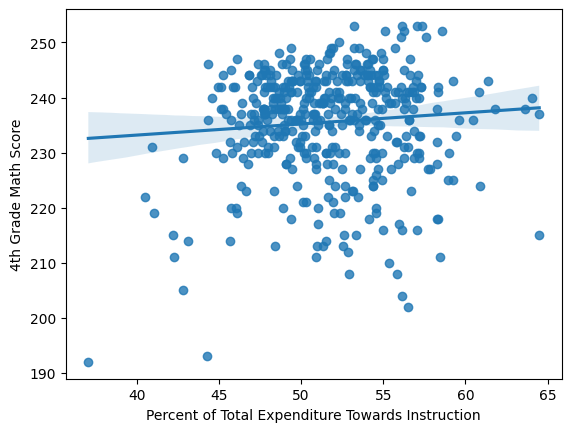

In [86]:
sns.regplot(x = df['PERCENT_INSTRUCTION_EXPENDITURE'], y = df['AVG_MATH_4_SCORE'])
plt.xlabel('Percent of Total Expenditure Towards Instruction')
plt.ylabel('4th Grade Math Score')

**There seems to be slight positive correlation between the two variables**

**Visualization 4**

Text(0, 0.5, '4th Grade Math Score')

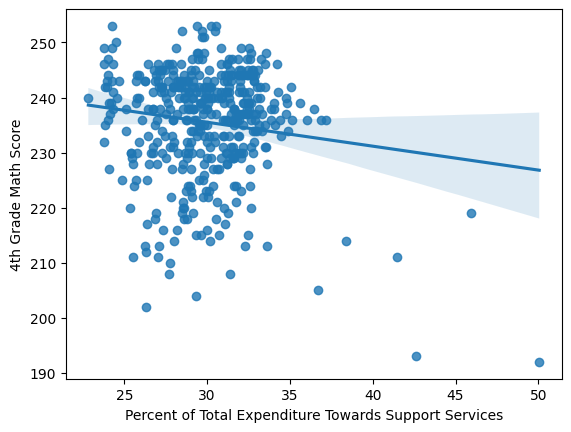

In [87]:
sns.regplot(x = df["PERCENT_SUPPORT_EXPENDITURE"], y = df['AVG_MATH_4_SCORE'])
plt.xlabel('Percent of Total Expenditure Towards Support Services')
plt.ylabel('4th Grade Math Score')

**There seems to be slight negative correlation between the two variables, contradicting my original thought of it being positive**

I will be proceeding with PERCENT_INSTRUCTION_EXPENDITURE and PERCENT_SUPPORT_EXPENDITURE, as they are the only variables I visualized that showed some element of correlation

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [88]:
from sklearn.model_selection import train_test_split

In [109]:
X = df[["PERCENT_SUPPORT_EXPENDITURE", "PERCENT_INSTRUCTION_EXPENDITURE"]].dropna()
y = df.loc[X.index]["AVG_MATH_4_SCORE"]

In [90]:
# Remove NaN in y by filling with median, response is left skewed
y.fillna(y.median(), inplace=True)

In [92]:
# Not a big dataset, using 70/30 split

X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size= .3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [93]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [94]:
# create your model here
model = LinearRegression()

In [95]:
model.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [98]:
# First want to see what the equation is
print(model.intercept_)
print(model.coef_)

235.72553674354842
[-0.3561073   0.21792862]


In [100]:
# Now follow it up with the R^2 value
model.score(X_test, y_test)

-0.048983155271503875

**And my model performs worse than a horizontal line**

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

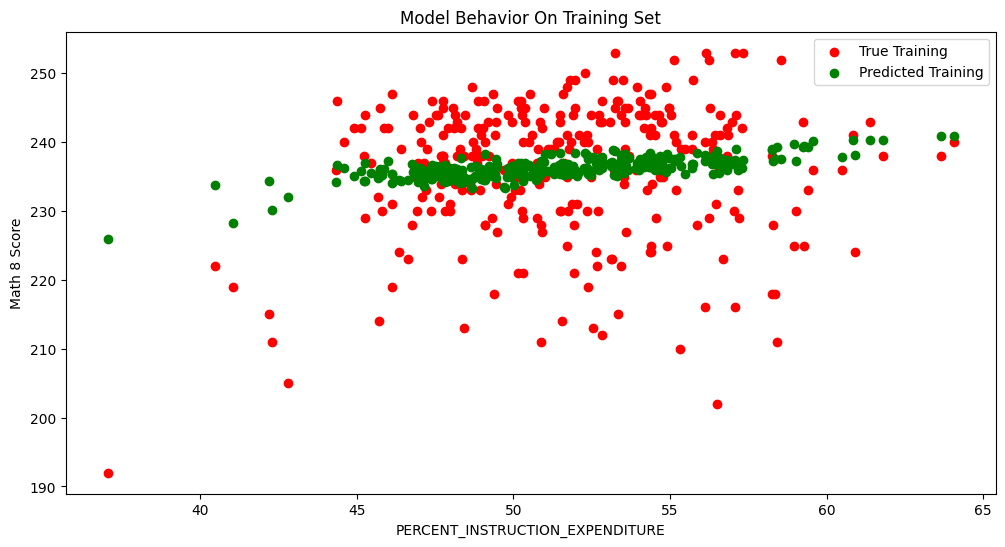

In [104]:
col_name = "PERCENT_INSTRUCTION_EXPENDITURE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel("Math 8 Score")
plt.title("Model Behavior On Training Set")


Text(0.5, 1.0, 'Model Behavior on Testing Set')

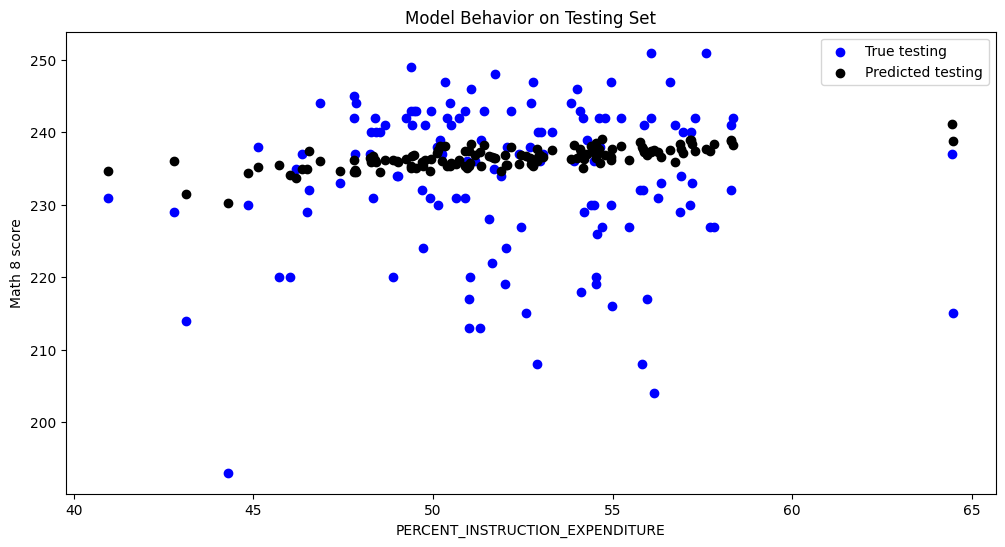

In [105]:
col_name = "PERCENT_INSTRUCTION_EXPENDITURE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel("Math 8 score")
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**After the initial phases of cleanup, standardization, creation of new attributes and visualizations to dictate both the distribution of the response and it's relation with multiple predictors, I found that the percentage of total revenue comprised at the state and local level had no bearing on the average 4th grade math score. The percentage of total expenditure belonging to instruction and support had a very slight effect on the response; however, my model was even worse than simply drawing a straight horizontal line. The attributes I both picked and created were almost worthless in predicting average 4th grade math scores**